Новые общедоступные данные о географии распространения случаев заболевания COVID-19 по всему миру, полученные от Европейского центра профилактики и контроля заболеваний (ЕЦПКЗ). Каждая строка или запись содержит количество новых случаев заболевания за день по отдельным странам или регионам.

In [6]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('https://pandemicdatalake.blob.core.windows.net/public/curated/covid-19/ecdc_cases/latest/ecdc_cases.csv')
df.tail()

,date_rep,day,month,year,cases,deaths,countries_and_territories,geo_id,country_territory_code,pop_data_2018,continent_exp,load_date,iso_country,daterep
50197,2020-03-25,25,3,2020,0.0,0,Zimbabwe,ZW,ZWE,NaN,Africa,2020-10-21 00:05:20,ZW,2020-03-25
50198,2020-03-24,24,3,2020,0.0,1,Zimbabwe,ZW,ZWE,NaN,Africa,2020-10-21 00:05:20,ZW,2020-03-24
50199,2020-03-23,23,3,2020,0.0,0,Zimbabwe,ZW,ZWE,NaN,Africa,2020-10-21 00:05:20,ZW,2020-03-23
50200,2020-03-22,22,3,2020,1.0,0,Zimbabwe,ZW,ZWE,NaN,Africa,2020-10-21 00:05:20,ZW,2020-03-22
50201,2020-03-21,21,3,2020,1.0,0,Zimbabwe,ZW,ZWE,NaN,Africa,2020-10-21 00:05:20,ZW,2020-03-21


**1)** Посмотрим на график количества заболеваний в России.

In [25]:
rus=df[df['country_territory_code']=='RUS'][['date_rep','cases','deaths']]

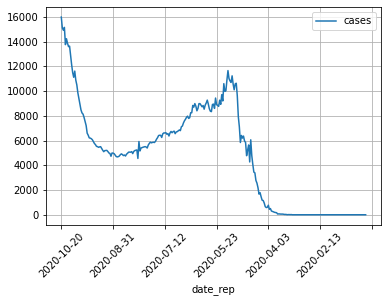

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
rus.plot(kind='line',x='date_rep',y="cases",grid=True,rot=45)

Из графика можно сделать вывод,что в России коронавирус появился в конце января,первая волна достигала 11000 заболеваний,затем спад до 5000.А вчера,20.10.2020 достигнут максимум - 16000 заболеваний  


**2)** Выясним,в какой части света больше всего смертей

In [33]:
materics=df.groupby(['continent_exp']).sum()[['deaths']]
materics.head()

,deaths
continent_exp,
Africa,39931
America,611701
Asia,224029
Europe,242594
Oceania,1021


Text(0, 0.5, 'количество')

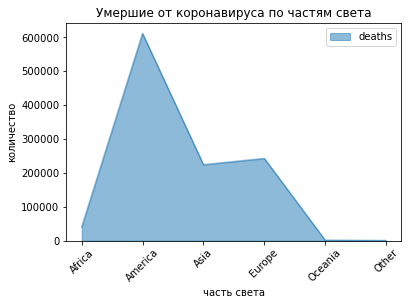

In [42]:
ax=materics.plot(kind='area', rot=45, stacked=False)
ax.set_title('Умершие от коронавируса по частям света')
ax.set_xlabel('часть света')
ax.set_ylabel('количество')

Из графика видно,что больше всего смертей в Америке

**3)** Выясним,в каких странах наибольший процент смертности от коронавируса

In [59]:
def procent(country):
    return country.deaths/country.cases*100

In [70]:
countries=df.groupby(['countries_and_territories']).agg({'deaths': 'sum', 'cases': 'sum'})
countries['procent']=countries.apply(procent,axis=1)
a=countries.sort_values('procent',ascending=False)
a.head()

,deaths,cases,procent
countries_and_territories,,,
Yemen,599,2060.0,29.077670
India,115197,968876.0,11.889757
United_States_of_America,220133,2126878.0,10.350053
Mexico,86338,854926.0,10.098886
Italy,36616,423578.0,8.644453


In [72]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [76]:
trace0 = go.Scatter(
    x=a.index,
    y=a.procent,
    name='procent'
)
layout = {'title': 'Статистика смертности по странам(%)'}
fig = go.Figure(data=trace0, layout=layout)
iplot(fig)

Из графика видно,что наибольший процент смертности от коронавируса в Йемене -29%,а в некоторых странах еще не было смертей.

**4)** Выясним положение дел в Европе

In [94]:
df2=df[df.continent_exp=='Europe'].groupby(['countries_and_territories']).agg({'deaths': 'sum', 'cases': 'sum'})
df2.head()

,deaths,cases
countries_and_territories,,
Albania,454,17350.0
Andorra,62,3623.0
Armenia,1091,65460.0
Austria,919,66611.0
Azerbaijan,630,45295.0


In [97]:
trace0 = go.Bar(
    x=df2.index,
    y=df2.deaths,
    name='смертей',
    orientation = 'v'
)

trace1 = go.Bar(
    x=df2.index,
    y=df2.cases,
    name='заразившихся',
    orientation = 'v'
)
data = [trace0, trace1]
layout = {'title': 'статистика стран Европы'}
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
Лидеры Европы по заразившимся коронавирусом это Россия,Испания,Франция,Великобритания.